# Introduction
This is a  project that  demonstrates how to predict  types of physical activity which includes: walking, climbing stairs from tri-axial smartphone accelerometer data using supervised machine learning. It's been said that Smartphone accelerometers are very precise, and that different physical activities give rise to unique patterns of acceleration.

## Input Data

The input data used for training in this project consists of two files.

The first file, train_time_series.csv, contains the raw accelerometer data, which has been collected using the Beiwe research platform, and it has the following format:

timestamp, UTC time, accuracy, x, y, z

The time series signals are sampled at 10 Hz (0.1 seconds per sample) and contains total 3744 samples and 3 components. timestamp column is the time variable. The last three columns labeled x, y, and z correspond to measurements of linear acceleration along each of the three orthogonal axes.

The second file, train_labels.csv, contains the activity labels. Different activities have been encoded with integers as follows:

1 = standing,
2 = walking,
3 = stairs down,
4 = stairs up.
The activity labels are sampled at 1 Hz (1 second per sample) and contains 375 samples. Because the accelerometers are sampled at high frequency, the labels in train_labels.csv are only provided for every 10th observation in train_time_series.csv.

# Method

1 I Loaded the accelerometer data

2 Exploratory Data Analysis
In this section, I carried out:

An initial exploration and data cleansing along the road.

3 Data Visualization.

4 Feature Engineering


5 Built classification models

Preparation of the datasets.

Splitting of our train time series into train and test sets for evaluating different models.

Choice of the right metric.

Test of the random forest classifier from the scikit-learn package:

Random Forest Classifier

6 Validation
We'll use the best model selected in the section to perform predictions of the activity classes in our test time series.

Time it!
Here, we will rerun our code but with a timer to determine the runtime. The code will include:

Loading the data,

Preprocessing the data,

Fitting and evaluating the model,

Validating with predictions of the activity classes in our test time series.

# Result
A model trained on Random Forest Classifier gives highest accuracy eventually of 70% on the  dataset.

## Python Implementation
Import Modules

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.stats
import math
#from siml.sk_utils import*
#from siml.signal_analysis_utils import *
#import sensormotion as sm
from scipy.fftpack import fft
from scipy.signal import welch
from numpy import savetxt
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.signal import find_peaks
from detecta import detect_peaks
import pywt
import time
import datetime as dt
from collections import defaultdict, Counter

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import time
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from timeit import default_timer
import matplotlib.pyplot as plt

# Set the timer

In [2]:

st = default_timer()

# Loading the accelerometer data

In [42]:
train_ts = pd.read_csv(r"C:\Users\AYOOLUWA\Downloads\train_time_series.csv", index_col=0)
train_labels = pd.read_csv(r"C:\Users\AYOOLUWA\Downloads\train_labels.csv", index_col=0)
test_ts = pd.read_csv(r"C:\Users\AYOOLUWA\Downloads\test_time_series.csv", index_col=0)
test_labels = pd.read_csv(r"C:\Users\AYOOLUWA\Downloads\test_labels.csv", index_col=0)
print("Shape of time series signals data:", train_ts.shape)
print("Shape of labels data:", train_labels.shape)
print("Shape of time series signals data:", test_ts.shape)
print("Shape of labels data:", test_labels.shape)

Shape of time series signals data: (3744, 6)
Shape of labels data: (375, 3)
Shape of time series signals data: (1250, 6)
Shape of labels data: (125, 3)


In [4]:
print("train_ts head: \n%s" % train_ts.head(), "\n")
print("train_labels head: \n%s" % train_labels.head(), "\n")
print("test_ts head: \n%s" % test_ts.head(), "\n")
print("test_labels head: \n%s" %test_labels.head(), "\n")

train_ts head: 
           timestamp                 UTC time accuracy         x         y  \
20586  1565109930787  2019-08-06T16:45:30.787  unknown -0.006485 -0.934860   
20587  1565109930887  2019-08-06T16:45:30.887  unknown -0.066467 -1.015442   
20588  1565109930987  2019-08-06T16:45:30.987  unknown -0.043488 -1.021255   
20589  1565109931087  2019-08-06T16:45:31.087  unknown -0.053802 -0.987701   
20590  1565109931188  2019-08-06T16:45:31.188  unknown -0.054031 -1.003616   

              z  
20586 -0.069046  
20587  0.089554  
20588  0.178467  
20589  0.068985  
20590  0.126450   

train_labels head: 
           timestamp                 UTC time  label
20589  1565109931087  2019-08-06T16:45:31.087      1
20599  1565109932090  2019-08-06T16:45:32.090      1
20609  1565109933092  2019-08-06T16:45:33.092      1
20619  1565109934094  2019-08-06T16:45:34.094      1
20629  1565109935097  2019-08-06T16:45:35.097      1 

test_ts head: 
           timestamp                 UTC time accu

# Preprocessing

In [5]:
# Drop "accuracy" column.
for data in [train_ts, test_ts]:
    data.drop("accuracy", axis = 1, inplace = True)
    
# Drop "UTC time" column.
for data in [train_ts, train_labels, test_ts, test_labels]:
    data.drop("UTC time", axis = 1, inplace = True)
    data.reset_index(drop = True, inplace = True)

In [6]:
print("train_ts head: \n%s" % train_ts.head(), "\n")
print("train_labels head: \n%s" % train_labels.head(), "\n")
print("test_ts head: \n%s" % test_ts.head(), "\n")
print("test_labels head: \n%s" % test_labels.head(), "\n")

train_ts head: 
       timestamp         x         y         z
0  1565109930787 -0.006485 -0.934860 -0.069046
1  1565109930887 -0.066467 -1.015442  0.089554
2  1565109930987 -0.043488 -1.021255  0.178467
3  1565109931087 -0.053802 -0.987701  0.068985
4  1565109931188 -0.054031 -1.003616  0.126450 

train_labels head: 
       timestamp  label
0  1565109931087      1
1  1565109932090      1
2  1565109933092      1
3  1565109934094      1
4  1565109935097      1 

test_ts head: 
       timestamp         x         y         z
0  1565110306139  0.034286 -1.504456  0.157623
1  1565110306239  0.409164 -1.038544  0.030975
2  1565110306340 -0.234390 -0.984558  0.124771
3  1565110306440  0.251114 -0.787003  0.054810
4  1565110306540  0.109924 -0.169510  0.235550 

test_labels head: 
       timestamp  label
0  1565110307041    NaN
1  1565110308043    NaN
2  1565110309046    NaN
3  1565110310048    NaN
4  1565110311050    NaN 



In [7]:
# Create a single dataset for training.
df_train = train_ts.merge(train_labels, how = "left", left_on = "timestamp", right_on = "timestamp")

# Create a single dataset for test.
df_test = test_ts.merge(test_labels, how = "left", left_on = "timestamp", right_on = "timestamp")

In [8]:
print("df_train: \n%s" % df_train, "\n")
print("df_test: \n%s" % df_test)

df_train: 
          timestamp         x         y         z  label
0     1565109930787 -0.006485 -0.934860 -0.069046    NaN
1     1565109930887 -0.066467 -1.015442  0.089554    NaN
2     1565109930987 -0.043488 -1.021255  0.178467    NaN
3     1565109931087 -0.053802 -0.987701  0.068985    1.0
4     1565109931188 -0.054031 -1.003616  0.126450    NaN
...             ...       ...       ...       ...    ...
3739  1565110305638  0.024384 -0.710709  0.030304    NaN
3740  1565110305738  0.487228 -1.099136 -0.015213    NaN
3741  1565110305838  0.369446 -0.968506  0.036713    NaN
3742  1565110305939  0.167877 -0.802826  0.049805    NaN
3743  1565110306039  0.689346 -0.991043  0.034973    4.0

[3744 rows x 5 columns] 

df_test: 
          timestamp         x         y         z  label
0     1565110306139  0.034286 -1.504456  0.157623    NaN
1     1565110306239  0.409164 -1.038544  0.030975    NaN
2     1565110306340 -0.234390 -0.984558  0.124771    NaN
3     1565110306440  0.251114 -0.787003 

In [9]:
# Create a single dataframe for the time series. This will help for data vizualisation. 
df = pd.concat([df_train, df_test], ignore_index = True)

df

,timestamp,x,y,z,label
0,1565109930787,-0.006485,-0.934860,-0.069046,NaN
1,1565109930887,-0.066467,-1.015442,0.089554,NaN
2,1565109930987,-0.043488,-1.021255,0.178467,NaN
3,1565109931087,-0.053802,-0.987701,0.068985,1.0
4,1565109931188,-0.054031,-1.003616,0.126450,NaN
...,...,...,...,...,...
4989,1565110430975,0.036499,-0.724823,0.553802,NaN
4990,1565110431075,-0.159241,0.307022,0.142410,NaN
4991,1565110431175,-0.037964,-0.673706,1.065445,NaN
4992,1565110431275,0.255707,-1.485397,-0.013336,NaN


In [10]:
# Check for duplicated rows.
print("df duplicated rows:", any(df["timestamp"].duplicated()))


df duplicated rows: False


In [11]:
# Check the data types, whether the types are matcing the contents.
print("df types: \n%s" % df.dtypes)

df types: 
timestamp      int64
x            float64
y            float64
z            float64
label        float64
dtype: object


In [12]:
# Check for lengths or durations of our time series. 
datetimeFormat = "%H:%M:%S.%f"
time_max = pd.datetime.fromtimestamp(df["timestamp"].max() / 1000).strftime("%H:%M:%S.%f")
time_min = pd.datetime.fromtimestamp(df["timestamp"].min() / 1000).strftime("%H:%M:%S.%f")
diff = pd.datetime.strptime(time_max, datetimeFormat) - pd.datetime.strptime(time_min, datetimeFormat)

print("Duration of df time series:", diff)
print("Duration in seconds and milliseconds:", "%d seconds" % diff.seconds, "and %d milliseconds" % int(diff.microseconds/1000))

Duration of df time series: 0:08:20.589000
Duration in seconds and milliseconds: 500 seconds and 589 milliseconds


In [13]:
#Data visualization

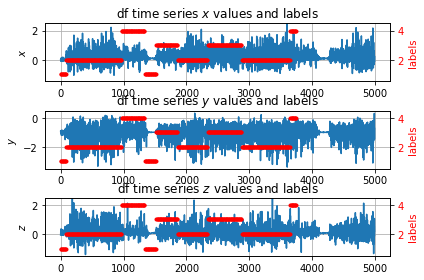

In [14]:
# Display of x-y-z signals against labels or activities.

fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot x signal 
ax1.plot(df["x"])
ax1.grid(True)
ax1.set_ylim((-1.5, 2.5))
ax1.set_ylabel("$x$")
ax1.set_title("df time series $x$ values and labels")

ax11 = ax1.twinx()  # instantiate a second axis that shares the same x-axis
ax11.set_ylim((0.5, 4.5))
ax11.set_ylabel("labels", color = "red")
ax11.plot(df["label"], color = "red", marker = ".")
ax11.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout()  

# Plot y signal
ax2.plot(df["y"])
ax2.grid(True)
ax2.set_ylim((-3.5, 0.5))
ax2.set_ylabel("$y$")
ax2.set_title("df time series $y$ values and labels")

ax21 = ax2.twinx()  # instantiate a second axis that shares the same x-axis
ax21.set_ylim((0.5, 4.5))
ax21.set_ylabel("labels", color = "red")
ax21.plot(df["label"], color = "red", marker = ".")
ax21.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout()  

# Plot z signal
ax3.plot(df["z"])
ax3.grid(True)
ax3.set_ylim((-1.5, 2.5))
ax3.set_ylabel("$z$")
ax3.set_title("df time series $z$ values and labels")

ax31 = ax3.twinx()  # instantiate a second axis that shares the same x-axis
ax31.set_ylim((0.5, 4.5))
ax31.set_ylabel("labels", color = "red")
ax31.plot(df["label"], color = "red", marker = ".")
ax31.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout()  

plt.subplots_adjust(hspace = 0.5)


# Feature Engineering

In [15]:
#Feature Engineering

In [16]:
# Making a copy of df to avoid back and forth as I progress.
df_eng = df.copy()

In [17]:
# Rolling averages
df_eng["x_mean"] = df_eng["x"][4:].rolling(window = 5).mean() # start at the 4th row to synchronize with labelling
df_eng["y_mean"] = (df_eng["y"][4:]+1).rolling(window = 5).mean() # offset removed for y signal
df_eng["z_mean"] = df_eng["z"][4:].rolling(window = 5).mean()

# Rolling standard deviations
df_eng["x_sd"] = df_eng["x"][4:].rolling(window = 5).std()
df_eng["y_sd"] = (df_eng["y"][4:]+1).rolling(window = 5).std() 
df_eng["z_sd"] = df_eng["z"][4:].rolling(window = 5).std()

# 3D-amplitude rolling averages
df_eng["magnitude"] = np.sqrt(df_eng["x"]**2 + (df_eng["y"]+1)**2 + df_eng["z"]**2) 
df_eng["m_mean"] = df_eng["magnitude"][4:].rolling(window = 5).mean()

# 3D-amplitude rolling standard deviations
df_eng["m_sd"] = df_eng["magnitude"][4:].rolling(window = 5).std()

# Energy which is related to the frequency of the signal according to the Parseval's theorem
df_eng["x_E"] = (df_eng["x"][4:]**2).rolling(window = 5).sum()
df_eng["y_E"] = ((df_eng["y"][4:]+1)**2).rolling(window = 5).sum() 
df_eng["z_E"] = (df_eng["z"][4:]**2).rolling(window = 5).sum()

In [18]:
df_eng

,timestamp,x,y,z,label,x_mean,y_mean,z_mean,x_sd,y_sd,z_sd,magnitude,m_mean,m_sd,x_E,y_E,z_E
0,1565109930787,-0.006485,-0.934860,-0.069046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.095145,NaN,NaN,NaN,NaN,NaN
1,1565109930887,-0.066467,-1.015442,0.089554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.112589,NaN,NaN,NaN,NaN,NaN
2,1565109930987,-0.043488,-1.021255,0.178467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.184914,NaN,NaN,NaN,NaN,NaN
3,1565109931087,-0.053802,-0.987701,0.068985,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.088345,NaN,NaN,NaN,NaN,NaN
4,1565109931188,-0.054031,-1.003616,0.126450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.137557,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,1565110430975,0.036499,-0.724823,0.553802,NaN,0.130811,0.118738,0.016656,0.348468,0.438107,0.411148,0.619477,0.631253,0.153850,0.571276,0.838244,0.677559
4990,1565110431075,-0.159241,0.307022,0.142410,NaN,-0.021384,0.382886,0.001117,0.240971,0.673304,0.402922,1.324366,0.767952,0.346972,0.234554,2.546363,0.649392
4991,1565110431175,-0.037964,-0.673706,1.065445,NaN,0.038455,0.554211,0.322531,0.169503,0.457117,0.492716,1.114936,0.825013,0.381403,0.122319,2.371576,1.491207
4992,1565110431275,0.255707,-1.485397,-0.013336,NaN,0.029044,0.417581,0.353714,0.151510,0.651193,0.457485,0.548794,0.854917,0.343673,0.096039,2.568080,1.462739


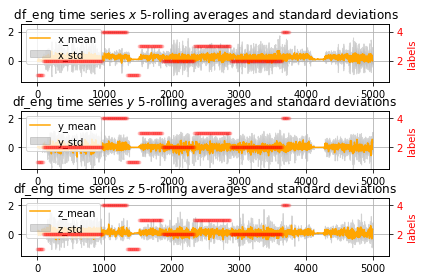

In [19]:
# Visualization of x, y, z rolling averages with their standard deviations vs. labels.

fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot x_mean signal and standard deviations
ax1.grid(True)
ax1.set_ylim((-1.5, 2.5))
ax1.plot(df_eng["x_mean"], label = "x_mean", color = "orange")
ax1.fill_between(df_eng.index,
                 df_eng["x_mean"] - df_eng["x_sd"],
                 df_eng["x_mean"] + df_eng["x_sd"],
                 alpha = 0.3, label = "x_std", color = "grey")
ax1.legend(loc = "upper left")
ax1.set_title(" df_eng time series $x$ 5-rolling averages and standard deviations")

ax11 = ax1.twinx()  
ax11.set_ylim((0.5, 4.5))
ax11.set_ylabel("labels", color = "red")
ax11.plot(df_eng["label"], alpha = 0.15, color = "red", linestyle = "None", marker = ".")
ax11.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout() 

# Plot y_mean signal and standard deviations
ax2.grid(True)
ax2.set_ylim((-1.5, 2.5))
ax2.plot(df_eng["y_mean"], label = "y_mean", color = "orange")
ax2.fill_between(df_eng.index,
                 df_eng["y_mean"] - df_eng["y_sd"],
                 df_eng["y_mean"] + df_eng["y_sd"],
                 alpha = 0.3, label = "y_std", color = "grey")
ax2.legend(loc = "upper left")
ax2.set_title("df_eng time series $y$ 5-rolling averages and standard deviations")

ax21 = ax2.twinx()  
ax21.set_ylim((0.5, 4.5))
ax21.set_ylabel("labels", color = "red")
ax21.plot(df_eng["label"], alpha = 0.15, color = "red", linestyle = "None", marker = ".")
ax21.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout() 

# Plot z_mean signal and standard deviations
ax3.grid(True)
ax3.set_ylim((-1.5, 2.5))
ax3.plot(df_eng["z_mean"], label = "z_mean", color = "orange")
ax3.fill_between(df_eng.index,
                 df_eng["z_mean"] - df_eng["z_sd"],
                 df_eng["z_mean"] + df_eng["z_sd"],
                 alpha = 0.3, label = "z_std", color = "grey")
ax3.legend(loc = "upper left")
ax3.set_title("df_eng time series $z$ 5-rolling averages and standard deviations")

ax31 = ax3.twinx()  
ax31.set_ylim((0.5, 4.5))
ax31.set_ylabel("labels", color = "red")
ax31.plot(df_eng["label"], alpha = 0.15, color = "red", linestyle = "None", marker = ".")
ax31.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout() 

plt.subplots_adjust(hspace = 0.5)


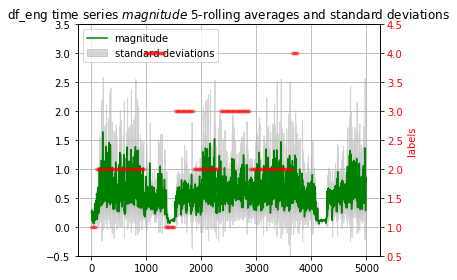

In [20]:
# Visualization of magnitude rolling averages with their standard deviations vs. labels.

fig, (ax1) = plt.subplots(1)

ax1.grid(True)
ax1.set_ylim((-0.5, 3.5))
ax1.plot(df_eng["m_mean"], label = "magnitude", color = "green")
ax1.fill_between(df_eng.index,
                 df_eng["m_mean"] - df_eng["m_sd"],
                 df_eng["m_mean"] + df_eng["m_sd"],
                 alpha = 0.3, label = "standard deviations", color = "grey")
ax1.legend(loc = "upper left")
ax1.set_title("df_eng time series $magnitude$ 5-rolling averages and standard deviations")

ax11 = ax1.twinx()  
ax11.set_ylim((0.5, 4.5))
ax11.set_ylabel("labels", color = "red")
ax11.plot(df_eng["label"], alpha = 0.15, color = "red", linestyle = "None", marker = ".")
ax11.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout()

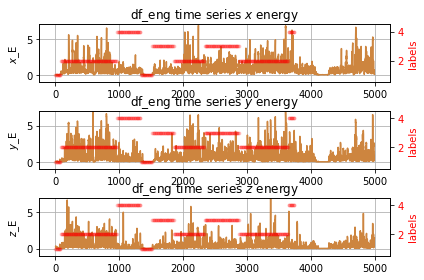

In [21]:
# Visualization of  x, y, z signals energy vs. labels.

fig, (ax1, ax2, ax3) = plt.subplots(3)

# Plot x signal energy
ax1.grid(True)
ax1.set_ylim((-1, 7))
ax1.plot(df_eng["x_E"], color = "peru")
ax1.set_ylabel("$x$_E")
ax1.set_title("df_eng time series $x$ energy")

ax11 = ax1.twinx()  
ax11.set_ylim((0.5, 4.5))
ax11.set_ylabel("labels", color = "red")
ax11.plot(df_eng["label"], alpha = 0.15, color = "red", linestyle = "None", marker = ".")
ax11.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout() 

# Plot y signal energy
ax2.grid(True)
ax2.set_ylim((-1, 7))
ax2.plot(df_eng["y_E"], color = "peru")
ax2.set_ylabel("$y$_E")
ax2.set_title("df_eng time series $y$ energy")

ax21 = ax2.twinx()  
ax21.set_ylim((0.5, 4.5))
ax21.set_ylabel("labels", color = "red")
ax21.plot(df_eng["label"], alpha = 0.15, color = "red", linestyle = "None", marker = ".")
ax21.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout() 

# Plot z signal energy
ax3.grid(True)
ax3.set_ylim((-1, 7))
ax3.plot(df_eng["z_E"], color = "peru")
ax3.set_ylabel("$z$_E")
ax3.set_title("df_eng time series $z$ energy")

ax31 = ax3.twinx()  
ax31.set_ylim((0.5, 4.5))
ax31.set_ylabel("labels", color = "red")
ax31.plot(df_eng["label"], alpha = 0.15, color = "red", linestyle = "None", marker = ".")
ax31.tick_params(axis = "y", labelcolor = "red")
fig.tight_layout() 

plt.subplots_adjust(hspace = 0.5)


In [22]:
#Insights:

'''Energy is definitely flat for class 1.

Energy is higher for class 2, clear for observations before #2000 but less clear for observations after.

Energy for class 3 seems a bit higher than for class 4, less obvious for observations after #2000.'''

'Energy is definitely flat for class 1.\n\nEnergy is higher for class 2, clear for observations before #2000 but less clear for observations after.\n\nEnergy for class 3 seems a bit higher than for class 4, less obvious for observations after #2000.'

# Building Classification Models

# Preparation of the datasets

In [65]:
split_time = 1565110306139
train_ts = df_eng.loc[df_eng["timestamp"] < split_time]
test_ts = df_eng.loc[df_eng["timestamp"] >= split_time]

print("train_ts: \n%s" % train_ts, "\n")
print("test_ts: \n%s" % test_ts)

train_ts: 
          timestamp         x         y         z  label    x_mean    y_mean  \
0     1565109930787 -0.006485 -0.934860 -0.069046    NaN       NaN       NaN   
1     1565109930887 -0.066467 -1.015442  0.089554    NaN       NaN       NaN   
2     1565109930987 -0.043488 -1.021255  0.178467    NaN       NaN       NaN   
3     1565109931087 -0.053802 -0.987701  0.068985    1.0       NaN       NaN   
4     1565109931188 -0.054031 -1.003616  0.126450    NaN       NaN       NaN   
...             ...       ...       ...       ...    ...       ...       ...   
3739  1565110305638  0.024384 -0.710709  0.030304    NaN  0.381805 -0.003494   
3740  1565110305738  0.487228 -1.099136 -0.015213    NaN  0.348709 -0.015271   
3741  1565110305838  0.369446 -0.968506  0.036713    NaN  0.408737 -0.128214   
3742  1565110305939  0.167877 -0.802826  0.049805    NaN  0.377667 -0.267410   
3743  1565110306039  0.689346 -0.991043  0.034973    4.0  0.347656  0.085556   

        z_mean      x_sd    

In [66]:
# Drop rows with NaN values in train_ts set.
train_ts = train_ts.dropna(how = "any")
train_ts.reset_index(drop = True, inplace = True)

# Drop "label" column from test_ts set and merge with the original label set, i.e. test_labels.
test_ts = test_ts.drop(labels = "label", axis = 1)
test_ts = test_ts.merge(test_labels, how = "right", left_on = "timestamp", right_on = "timestamp")

print("train_ts: \n%s" % train_ts, "\n")
print("test_ts: \n%s" % test_ts)

train_ts: 
         timestamp         x         y         z  label    x_mean    y_mean  \
0    1565109932090  0.013718 -0.852371 -0.000870    1.0 -0.017218  0.052502   
1    1565109933092  0.145584 -1.007843 -0.036819    1.0  0.096811  0.000986   
2    1565109934094 -0.099380 -1.209686  0.304489    1.0 -0.065198  0.007608   
3    1565109935097  0.082794 -1.001434 -0.025375    1.0  0.036398 -0.003287   
4    1565109936099  0.037582 -0.998383  0.019333    1.0  0.050793 -0.004266   
..             ...       ...       ...       ...    ...       ...       ...   
369  1565110302030 -0.641953 -1.469177  0.301041    4.0  0.280923 -0.130682   
370  1565110303032 -0.171616 -0.366074 -0.059082    4.0  0.052682  0.076358   
371  1565110304034  0.401810 -1.077698  0.258911    4.0  0.209601 -0.136621   
372  1565110305037  0.330338 -1.470062  0.303894    4.0  0.366956 -0.035223   
373  1565110306039  0.689346 -0.991043  0.034973    4.0  0.347656  0.085556   

       z_mean      x_sd      y_sd      z

In [67]:
#Imbalanced classes

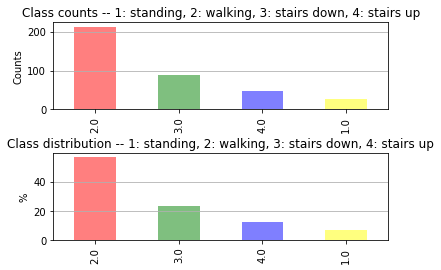

In [68]:
# Visualization of classes balance.

clist = ["red", "green", "blue", "yellow"]

fig, (ax1, ax2) = plt.subplots(2)

train_ts["label"].value_counts().plot(kind = "bar", color = clist, alpha = 0.5, ax = ax1)
ax1.yaxis.grid(True)
ax1.set_ylabel("Counts")
ax1.set_title("Class counts -- 1: standing, 2: walking, 3: stairs down, 4: stairs up")

distrib = train_ts["label"].value_counts(normalize = True)*100.00
distrib.plot(kind = "bar", color = clist, alpha = 0.5, ax = ax2)
ax2.yaxis.grid(True)
ax2.set_ylabel("%")
ax2.set_title("Class distribution -- 1: standing, 2: walking, 3: stairs down, 4: stairs up")

plt.subplots_adjust(hspace = 0.5)

# Splitting to train and test sets for building models
Spliting the X_train set into to one training set and one testing set with a ratio of 75/25 for building our models.

In [70]:
mod_train = train_ts.iloc[0:int(len(train_ts)*0.75)]
mod_test = train_ts.iloc[int(len(train_ts)*0.75):len(train_ts)]

print("mod_train: \n%s" % mod_train, "\n")
print("mod_test: \n%s" % mod_test)

mod_train: 
         timestamp         x         y         z  label    x_mean    y_mean  \
0    1565109932090  0.013718 -0.852371 -0.000870    1.0 -0.017218  0.052502   
1    1565109933092  0.145584 -1.007843 -0.036819    1.0  0.096811  0.000986   
2    1565109934094 -0.099380 -1.209686  0.304489    1.0 -0.065198  0.007608   
3    1565109935097  0.082794 -1.001434 -0.025375    1.0  0.036398 -0.003287   
4    1565109936099  0.037582 -0.998383  0.019333    1.0  0.050793 -0.004266   
..             ...       ...       ...       ...    ...       ...       ...   
275  1565110207814  0.286728 -0.772873  0.004883    3.0  0.217883 -0.136908   
276  1565110208816 -0.554367 -1.945923 -0.351334    3.0  0.096323 -0.050458   
277  1565110209818  0.732361 -0.938477 -0.078278    3.0  0.226181  0.161777   
278  1565110210821  0.257874 -0.615005  0.031891    3.0  0.331747  0.339182   
279  1565110211823  0.275391 -0.700226  0.007645    3.0  0.076016  0.122168   

       z_mean      x_sd      y_sd      

In [71]:
print("mod_train class counts: \n%s" % mod_train["label"].value_counts(), "\n")
print("mod_test class counts: \n%s" % mod_test["label"].value_counts())

mod_train class counts: 
2.0    136
3.0     81
4.0     37
1.0     26
Name: label, dtype: int64 

mod_test class counts: 
2.0    77
4.0    10
3.0     7
Name: label, dtype: int64


In [72]:
#Cross-validation

Observations: 96
Training Observations: 50
Testing Observations: 46
Observations: 142
Training Observations: 96
Testing Observations: 46
Observations: 188
Training Observations: 142
Testing Observations: 46
Observations: 234
Training Observations: 188
Testing Observations: 46
Observations: 280
Training Observations: 234
Testing Observations: 46


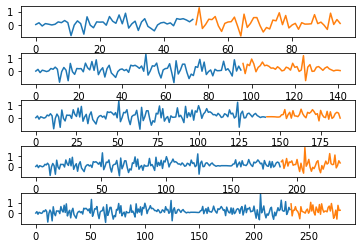

In [73]:
# scikit-learn time series cross-validator. 
tscv = TimeSeriesSplit(n_splits = 5) 

# Example of TimeSeriesSplit on x signal
X = np.array(mod_train["x"])
index = 1
plt.figure(1)
for train_index, test_index in tscv.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	plt.subplot(510 + index)
	plt.plot(train)
	plt.plot([None for i in train] + [ii for ii in test])
	index += 1
plt.subplots_adjust(hspace = 0.5)

# User-defined functions
Defined-functions for building models

In [75]:
def predict_F1(estimator, covariates, X, Y):
    """
    This function takes estimator: classifier, covariates: array of features, 
    X: train set including labels, Y: test set including labels.
    It computes and returns the best estimator, predictions and F1 score.
    """
    train_covariates = X[covariates]
    train_labels = X["label"].astype("int")
    test_covariates = Y[covariates]
    test_labels = Y["label"].astype("int")
    
    if (estimator == LogisticRegression):
        lrc = estimator(class_weight = "balanced", random_state = 699, max_iter = 1000) # class_weight = "balanced" for unbalanced datasets
        param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
        lrc_grid = GridSearchCV(lrc, param_grid, scoring = "f1_weighted", cv = tscv)
        lrc_grid.fit(train_covariates, train_labels);
        best_lrc = lrc_grid.best_estimator_
        # evaluating
        lrc_predictions = best_lrc.fit(train_covariates, train_labels).predict(test_covariates)
        F1_score = f1_score(test_labels, lrc_predictions, average = "weighted")
        return (best_lrc, lrc_predictions, F1_score)
    
    elif (estimator == KNeighborsClassifier):
        knn = estimator()
        param_grid = {"n_neighbors": [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                      "weights": ["uniform", "distance"], "p": [1, 2, 5]}
        knn_grid = GridSearchCV(knn, param_grid, scoring = "f1_weighted", cv = tscv)
        knn_grid.fit(train_covariates, train_labels);
        best_knn = knn_grid.best_estimator_
        # evaluating
        knn_predictions = best_knn.fit(train_covariates, train_labels).predict(test_covariates)
        F1_score = f1_score(test_labels, knn_predictions, average = "weighted")
        return (best_knn, knn_predictions, F1_score)
    
        
    elif (estimator == RandomForestClassifier):
        rfc = estimator(class_weight = "balanced", random_state = 699) # class_weight = "balanced" for unbalanced datasets
        param_grid = {"n_estimators": [10, 20, 60, 100], "criterion": ["gini", "entropy"], "max_depth": [6, 8, 12, 16]}
        rfc_grid = GridSearchCV(rfc, param_grid, scoring = "f1_weighted", cv = tscv)
        rfc_grid.fit(train_covariates, train_labels);
        best_rfc = rfc_grid.best_estimator_
        # Evaluating
        rfc_predictions = best_rfc.fit(train_covariates, train_labels).predict(test_covariates)
        F1_score = f1_score(test_labels, rfc_predictions, average = "weighted")
        return (best_rfc, rfc_predictions, F1_score)            
        
    elif (estimator == GradientBoostingClassifier):
        gbc = estimator(random_state = 699) 
        param_grid = {"n_estimators": [10, 20, 60, 100], "max_depth": [6, 8, 12, 16]}
        gbc_grid = GridSearchCV(gbc, param_grid, scoring = "f1_weighted", cv = tscv)
        gbc_grid.fit(train_covariates, train_labels);
        best_gbc = gbc_grid.best_estimator_
        # Evaluating
        gbc_predictions = best_gbc.fit(train_covariates, train_labels).predict(test_covariates)
        F1_score = f1_score(test_labels, gbc_predictions, average = "weighted")
        return (best_gbc, gbc_predictions, F1_score)

In [76]:
def eval_cm(estimator, covariates, X, Y):
    """
    This function takes estimator: classifier, covariates: array of features, 
    X: train set including labels, Y: test set including labels.
    It shows F1 score, predictions and a normalized confusion matrix.
    """
    #train_covariates = X[covariates]
    #train_labels = X["label"].astype("int").astype("category")
    test_covariates = Y[covariates]
    test_labels = Y["label"].astype("int")
        
    if (estimator == LogisticRegression):
        best_lrc, lrc_predictions, F1_score = predict_F1(estimator, covariates, X, Y)        
        print("F1 score:", F1_score)
        print("classes counts: \n%s" % np.array(np.unique(lrc_predictions, return_counts = True)))
        classes = list(np.array(np.unique(lrc_predictions, return_counts = True))[0])
        title ="Logistic Regression normalized Confusion Matrix"
        disp = plot_confusion_matrix(best_lrc, test_covariates, test_labels, display_labels = classes,
                                     cmap = plt.cm.Blues, normalize = "pred")
        disp.ax_.set_title(title);
    
    elif (estimator == KNeighborsClassifier):
        best_knn, knn_predictions, F1_score = predict_F1(estimator, covariates, X, Y)        
        print("F1 score:", F1_score)
        print("classes counts: \n%s" % np.array(np.unique(knn_predictions, return_counts = True)))
        classes = list(np.array(np.unique(knn_predictions, return_counts = True))[0])
        title ="Nearest Neighbors normalized Confusion Matrix"
        disp = plot_confusion_matrix(best_knn, test_covariates, test_labels, display_labels = classes,
                                     cmap = plt.cm.Blues, normalize = "pred")
        disp.ax_.set_title(title);
        
    elif (estimator == RandomForestClassifier):
        best_rfc, rfc_predictions, F1_score = predict_F1(estimator, covariates, X, Y)
        print("F1 score:", F1_score)
        print("classes counts: \n%s" % np.array(np.unique(rfc_predictions, return_counts = True)))
        classes = list(np.array(np.unique(rfc_predictions, return_counts = True))[0])
        title ="Random Forest Classifier normalized Confusion Matrix"
        disp = plot_confusion_matrix(best_rfc, test_covariates, test_labels, display_labels = classes,
                                     cmap = plt.cm.Blues, normalize = "pred")
        disp.ax_.set_title(title);               
        
    elif (estimator == GradientBoostingClassifier):
        best_gbc, gbc_predictions, F1_score = predict_F1(estimator, covariates, X, Y)
        print("F1 score:", F1_score)
        print("classes counts: \n%s" % np.array(np.unique(gbc_predictions, return_counts = True)))
        classes = list(np.array(np.unique(gbc_predictions, return_counts = True))[0])
        title ="Gradient Boosting Classifier normalized Confusion Matrix"
        disp = plot_confusion_matrix(best_gbc, test_covariates, test_labels, display_labels = classes,
                                     cmap = plt.cm.Blues, normalize = "pred")
        disp.ax_.set_title(title);

In [77]:
def case_scoring(predicted, true):
    score = []
    matches = 0
    if predicted.shape != true.shape:
        print("predicted labels and true labels must have same size")
    else:
        for x,y in zip(predicted, true):
            if x == y:
                matches += 1
    score.append(np.round(matches/true.shape[0],4)) # Calculate the score for accuracy to 4 decimal places
    return score[0]

# Classifier

# Random Forest Classifier

In [80]:
raw_covariates = ["x", "y", "z"] 
mod1_best, mod1_preds, mod1_F1  = predict_F1(LogisticRegression, raw_covariates, mod_train, mod_test)

# Create a table that's going to store the results that we obtain as we're going to compare different models.
mod_test_labels = np.array(mod_test["label"].astype(int))
results = pd.DataFrame(np.array([["LR with x, y, z raw signals", np.round(mod1_F1, 5),
                                  np.round(case_scoring(mod1_preds, mod_test_labels), 5)]]),
                                  columns = ["Model", "F1_score", "case accuracy"])
print(results)

                         Model F1_score case accuracy
0  LR with x, y, z raw signals  0.15933        0.1489


In [81]:
raw_covariates = ["x", "y", "z"] 
mod7_best, mod7_preds, mod7_F1  = predict_F1(RandomForestClassifier, raw_covariates, mod_train, mod_test)

mod7 = pd.DataFrame({"Model":["RF with x, y, z raw signals"], "F1_score":[mod7_F1], 
                     "case accuracy":[case_scoring(mod7_preds, mod_test_labels)]})
results = pd.concat([results, np.round(mod7, 5)], sort = "False", ignore_index = True)
print(results)

  F1_score                        Model case accuracy
0  0.15933  LR with x, y, z raw signals        0.1489
1  0.56027  RF with x, y, z raw signals        0.4787


F1 score: 0.5602658730605218
classes counts: 
[[ 1  2  3  4]
 [ 7 45 21 21]]


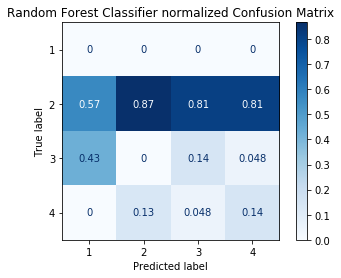

In [82]:
eval_cm(RandomForestClassifier, raw_covariates, mod_train, mod_test)

In [83]:
# Random Forest - Model 3.2
tf_covariates = ["x_mean", "y_mean", "z_mean", "x_E", "y_E", "z_E"] 
mod8_best, mod8_preds, mod8_F1  = predict_F1(RandomForestClassifier, tf_covariates, mod_train, mod_test)

mod8 = pd.DataFrame({"Model":["RF with means and energies features"], "F1_score":[mod8_F1], 
                     "case accuracy":[case_scoring(mod8_preds, mod_test_labels)]})
results = pd.concat([results, np.round(mod8, 5)], sort = "False", ignore_index = True)
print(results)

  F1_score                                Model case accuracy
0  0.15933          LR with x, y, z raw signals        0.1489
1  0.56027          RF with x, y, z raw signals        0.4787
2  0.70498  RF with means and energies features        0.6809


F1 score: 0.7049828055879853
classes counts: 
[[ 2  3  4]
 [64 21  9]]


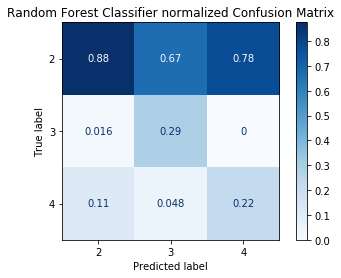

In [84]:
eval_cm(RandomForestClassifier, tf_covariates, mod_train, mod_test)

In [85]:
# Random Forest - Model 3.3
all_covariates = ["x_mean", "y_mean", "z_mean", "x_sd", "y_sd", "z_sd", "m_mean", "m_sd", "x_E", "y_E", "z_E"] 
mod9_best, mod9_preds, mod9_F1  = predict_F1(RandomForestClassifier, all_covariates, mod_train, mod_test)

mod9 = pd.DataFrame({"Model":["RF with all features"], "F1_score":[mod9_F1], 
                     "case accuracy":[case_scoring(mod9_preds, mod_test_labels)]})
results = pd.concat([results, np.round(mod9, 5)], sort = "False", ignore_index = True)
print(results)

  F1_score                                Model case accuracy
0  0.15933          LR with x, y, z raw signals        0.1489
1  0.56027          RF with x, y, z raw signals        0.4787
2  0.70498  RF with means and energies features        0.6809
3  0.70182                 RF with all features        0.6702


F1 score: 0.7018164634286902
classes counts: 
[[ 2  3  4]
 [65 19 10]]


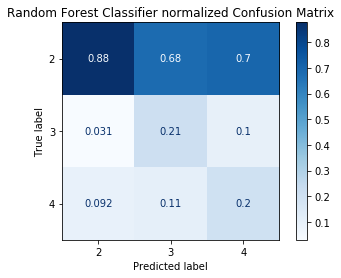

In [86]:
eval_cm(RandomForestClassifier, all_covariates, mod_train, mod_test)

# Validation

In [89]:
covariates = ["x_mean", "y_mean", "z_mean", "x_sd", "y_sd", "z_sd", "m_mean", "m_sd", "x_E", "y_E", "z_E"] 
train_covariates = train_ts[covariates]
train_labels = train_ts["label"].astype("int")
test_covariates = test_ts[covariates]

tscv = TimeSeriesSplit(n_splits = 5) 

rfc = RandomForestClassifier(class_weight = "balanced", random_state = 699) # class_weight = "balanced" for unbalanced datasets
param_grid = {"n_estimators": [10, 20, 60, 100], "criterion": ["gini", "entropy"], "max_depth": [6, 8, 12, 16]}
rfc_grid = GridSearchCV(rfc, param_grid, scoring = "f1_weighted", cv = tscv)
rfc_grid.fit(train_covariates, train_labels);
best_rfc = rfc_grid.best_estimator_
rfc_predictions = best_rfc.fit(train_covariates, train_labels).predict(test_covariates)

In [90]:
print("Predictions: \n%s" % list(rfc_predictions))

Predictions: 
[2, 2, 3, 2, 4, 2, 4, 4, 4, 3, 3, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 4, 2, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 4, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2]


In [94]:
# save to csv file
savetxt('predictions.csv', rfc_predictions, delimiter = ",")

# Total running time of the script

In [91]:
# Total running time of the script
runtime = default_timer() - st
print("Elapsed time in seconds: ", round(runtime,2))

Elapsed time in seconds:  7738.25


# Conclusion
I chose the Random Forest Classifier as it seems to be more robust by observing the results over all setups.

Validation of this model shows a good classification of class 1 (walking) but mixed results for classes 2, 3 and 4. That's somewhat expected as we know that they are related activities (respectively walking, stairs down and stairs up) are similar in nature.